In [1]:
# Mandatory operation for importing custom libraries
from pathlib import Path
import sys

cwd = Path.cwd()
base = cwd.parent
sys.path.append(str(base))

In [2]:
# Testing FileManager
from file_manager.file_manager import FileManager

file_manager = FileManager()
print(file_manager.data_folder)

c:\Users\User\Desktop\Hi!ckathon\hickathon5\data


In [3]:
import pandas as pd
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [4]:
train_data = file_manager.load_training_data()
test_data = file_manager.load_test_data()

# Util functions

In [5]:
# utils.py

import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Plotting

def plot_variable(df, variable, plot_type='hist', **kwargs):
    """
    Plot a variable from a DataFrame with customizable plot type.

    Parameters:
    - df (pd.DataFrame): The dataset.
    - variable (str): The column name of the variable to plot.
    - plot_type (str): The type of plot ('hist', 'line', 'scatter', 'box', etc.).
    - **kwargs: Additional keyword arguments for customization.

    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=kwargs.get('figsize', (10, 6)))
    title = kwargs.get('title', f"Plot of {variable}")

    if plot_type == 'hist':
        sns.histplot(df[variable], kde=kwargs.get('kde', True), bins=kwargs.get('bins', 30), color=kwargs.get('color', 'blue'))
    elif plot_type == 'line':
        plt.plot(df[variable], color=kwargs.get('color', 'blue'), label=kwargs.get('label', variable))
        plt.legend()
    elif plot_type == 'scatter':
        x = kwargs.get('x')
        if x is None:
            raise ValueError("For scatter plot, 'x' must be specified as a column name.")
        sns.scatterplot(x=df[x], y=df[variable], color=kwargs.get('color', 'blue'))
    elif plot_type == 'box':
        sns.boxplot(x=df[variable], color=kwargs.get('color', 'blue'))
    else:
        raise ValueError(f"Unsupported plot type: {plot_type}")

    plt.title(title, fontsize=kwargs.get('title_fontsize', 16))
    plt.xlabel(kwargs.get('xlabel', variable), fontsize=kwargs.get('label_fontsize', 14))
    plt.ylabel(kwargs.get('ylabel', 'Frequency' if plot_type == 'hist' else ''), fontsize=kwargs.get('label_fontsize', 14))
    plt.grid(kwargs.get('grid', True))
    plt.show()


# 2 : Processing

def column_filler(df, col, type=None):
    """
    Fills missing values in a specified column of a DataFrame based on its data type and a chosen method.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to fill.
    - col (str): The name of the column to process.
    - type (str, optional): The filling method. Options:
        - 'mean' (default): Fill missing values with the column's mean (for numerical columns).
        - 'median': Fill missing values with the column's median (for numerical columns).
        - For object-type columns, the mode is used by default.

    Behavior:
    - If the column is numeric (int64 or float64):
        - Default ('mean'): Fills missing values with the mean of the column.
        - If 'median' is specified, fills missing values with the median.
        - If an unsupported method is provided, raises a ValueError.
    - If the column is of type 'object' (e.g., strings):
        - Fills missing values with the most frequent value (mode).
    - If the column's data type is unsupported, raises a ValueError.
    """
    if df[col].dtype in ['int64', 'float64']:
        if type is None or type == 'mean':
            df[col].fillna(df[col].mean(), inplace=True)  # Replace NaN with the mean

        elif type == 'median':
            df[col].fillna(df[col].median(), inplace=True)  # Replace NaN with the median

        else:
            raise ValueError(f"Unsupported method: {type}")

    elif df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Replace NaN with the most frequent value (mode)

    else:
        raise ValueError(f"Unsupported data type: {df[col].dtype}")


def separate_col(df, list):
    categorical_variables = []
    continuous_variables = []
    for col in list:
        if df[col].dtype in ['int64', 'float64']:
            continuous_variables.append(col)

        elif df[col].dtype == 'object':
            categorical_variables.append(col)

        else:
            raise ValueError(f"Unsupported data type: {df[col].dtype}")

    return categorical_variables, continuous_variables


# 3. Variable Analysis

def compare(df, var1, var2):
    # Check if each value in var1 is associated with a unique value in var2
    unique_var1_to_var2 = df.groupby(var1)[var2].nunique()
    if (unique_var1_to_var2 == 1).all():
        print(f"Each value in {var1} is associated with a unique identifier in {var2}.")
    else:
        print(f"Some values in {var1} are associated with multiple identifiers in {var2}:")
        # Print the values in var1 that have more than one unique corresponding value in var2
        print(unique_var1_to_var2[unique_var1_to_var2 > 1])

    # Check if each value in var2 is associated with a unique value in var1
    unique_var2_to_var1 = df.groupby(var2)[var1].nunique()
    if (unique_var2_to_var1 == 1).all():
        print(f"Each identifier in {var2} is associated with a single value in {var1}.")
    else:
        print(f"Some identifiers in {var2} are associated with multiple values in {var1}:")
        # Print the values in var2 that have more than one unique corresponding value in var1
        print(unique_var2_to_var1[unique_var2_to_var1 > 1])

# Metadata of the withdrawal variables

In [6]:
# Function to extract variable category
def extract_category(
        df: pd.DataFrame,
        category: str,
) -> pd.DataFrame:
    return df[df.columns[df.columns.str.startswith(category)]]

In [7]:
train_data = extract_category(train_data, 'prelev')

In [11]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2830316 entries, 0 to 3294084
Data columns (total 22 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   prelev_structure_code_0               object 
 1   prelev_volume_0                       float64
 2   prelev_usage_label_0                  object 
 3   prelev_volume_obtention_mode_label_0  object 
 4   prelev_longitude_0                    float64
 5   prelev_latitude_0                     float64
 6   prelev_commune_code_insee_0           float64
 7   prelev_structure_code_1               object 
 8   prelev_volume_1                       float64
 9   prelev_usage_label_1                  object 
 10  prelev_volume_obtention_mode_label_1  object 
 11  prelev_longitude_1                    float64
 12  prelev_latitude_1                     float64
 13  prelev_commune_code_insee_1           float64
 14  prelev_structure_code_2               object 
 15  prelev_volume_2     

In [12]:
train_data.count()

prelev_structure_code_0                 2277547
prelev_volume_0                         2277547
prelev_usage_label_0                    2277547
prelev_volume_obtention_mode_label_0    2277547
prelev_longitude_0                      2277547
prelev_latitude_0                       2277547
prelev_commune_code_insee_0             2277547
prelev_structure_code_1                 2276818
prelev_volume_1                         2276818
prelev_usage_label_1                    2276818
prelev_volume_obtention_mode_label_1    2276818
prelev_longitude_1                      2276818
prelev_latitude_1                       2276818
prelev_commune_code_insee_1             2276818
prelev_structure_code_2                 2274386
prelev_volume_2                         2274386
prelev_usage_label_2                    2274386
prelev_volume_obtention_mode_label_2    2274386
prelev_longitude_2                      2274386
prelev_latitude_2                       2274386
prelev_commune_code_insee_2             

In [10]:
print(train_data.iloc[0])

prelev_structure_code_0                          OPR0000048924
prelev_volume_0                                  10743145235.0
prelev_usage_label_0                    EAU TURBINEE (barrage)
prelev_volume_obtention_mode_label_0          Mesure indirecte
prelev_longitude_0                                    5.811394
prelev_latitude_0                                    45.878862
prelev_commune_code_insee_0                             1010.0
prelev_structure_code_1                          OPR0000048938
prelev_volume_1                                  10608280884.0
prelev_usage_label_1                    EAU TURBINEE (barrage)
prelev_volume_obtention_mode_label_1          Mesure indirecte
prelev_longitude_1                                     5.83283
prelev_latitude_1                                    45.958585
prelev_commune_code_insee_1                             1407.0
prelev_structure_code_2                          OPR0000048941
prelev_volume_2                                  103809

# Fill and seperate columns

prelev_structure_code_0                          OPR0000048924
prelev_volume_0                                  10743145235.0
prelev_usage_label_0                    EAU TURBINEE (barrage)
prelev_volume_obtention_mode_label_0          Mesure indirecte
prelev_longitude_0                                    5.811394
prelev_latitude_0                                    45.878862
prelev_commune_code_insee_0                             1010.0
prelev_structure_code_1                          OPR0000048938
prelev_volume_1                                  10608280884.0
prelev_usage_label_1                    EAU TURBINEE (barrage)
prelev_volume_obtention_mode_label_1          Mesure indirecte
prelev_longitude_1                                     5.83283
prelev_latitude_1                                    45.958585
prelev_commune_code_insee_1                             1407.0
prelev_structure_code_2                          OPR0000048941
prelev_volume_2                                  10380984702.0
prelev_usage_label_2                    EAU TURBINEE (barrage)
prelev_volume_obtention_mode_label_2          Mesure indirecte
prelev_longitude_2                                    5.698947
prelev_latitude_2                                    45.725106
prelev_commune_code_insee_2                             1454.0
prelev_other_volume_sum                           1793055303.0

In [14]:
# prelev_structure_code_0
column_filler(train_data, "prelev_structure_code_0")
# prelev_volume_0
column_filler(train_data, "prelev_volume_0")
# prelev_usage_label_0
column_filler(train_data, "prelev_usage_label_0")
# prelev_volume_obtention_mode_label_0
column_filler(train_data, "prelev_volume_obtention_mode_label_0")
# prelev_longitude_0
column_filler(train_data, "prelev_longitude_0")
# prelev_latitude_0
column_filler(train_data, "prelev_latitude_0")
# prelev_commune_code_insee_0
column_filler(train_data, "prelev_commune_code_insee_0")

In [15]:
# prelev_structure_code_0
column_filler(train_data, "prelev_structure_code_1")
# prelev_volume_0
column_filler(train_data, "prelev_volume_1")
# prelev_usage_label_0
column_filler(train_data, "prelev_usage_label_1")
# prelev_volume_obtention_mode_label_0
column_filler(train_data, "prelev_volume_obtention_mode_label_1")
# prelev_longitude_0
column_filler(train_data, "prelev_longitude_1")
# prelev_latitude_0
column_filler(train_data, "prelev_latitude_1")
# prelev_commune_code_insee_0
column_filler(train_data, "prelev_commune_code_insee_1")

In [16]:
# prelev_structure_code_0
column_filler(train_data, "prelev_structure_code_2")
# prelev_volume_0
column_filler(train_data, "prelev_volume_2")
# prelev_usage_label_0
column_filler(train_data, "prelev_usage_label_2")
# prelev_volume_obtention_mode_label_0
column_filler(train_data, "prelev_volume_obtention_mode_label_2")
# prelev_longitude_0
column_filler(train_data, "prelev_longitude_2")
# prelev_latitude_0
column_filler(train_data, "prelev_latitude_2")
# prelev_commune_code_insee_0
column_filler(train_data, "prelev_commune_code_insee_2")

# Plot functions

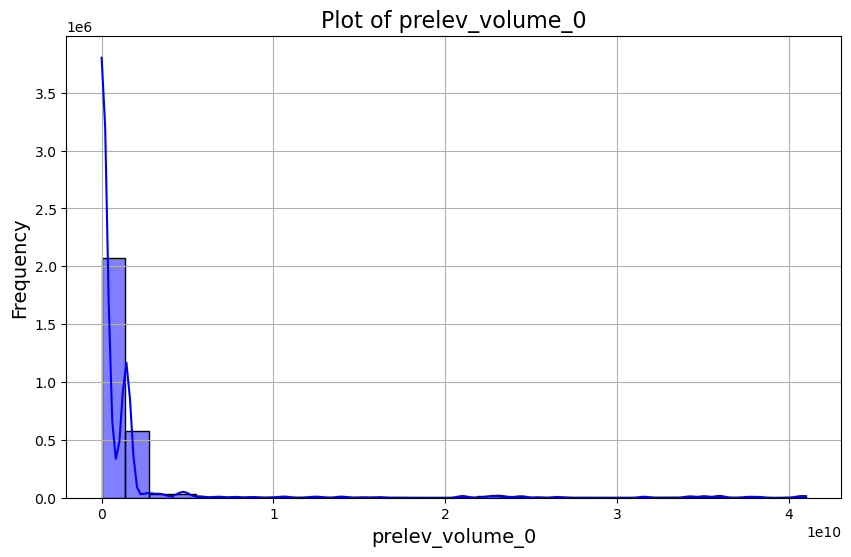

In [17]:
plot_variable(train_data, "prelev_volume_0")

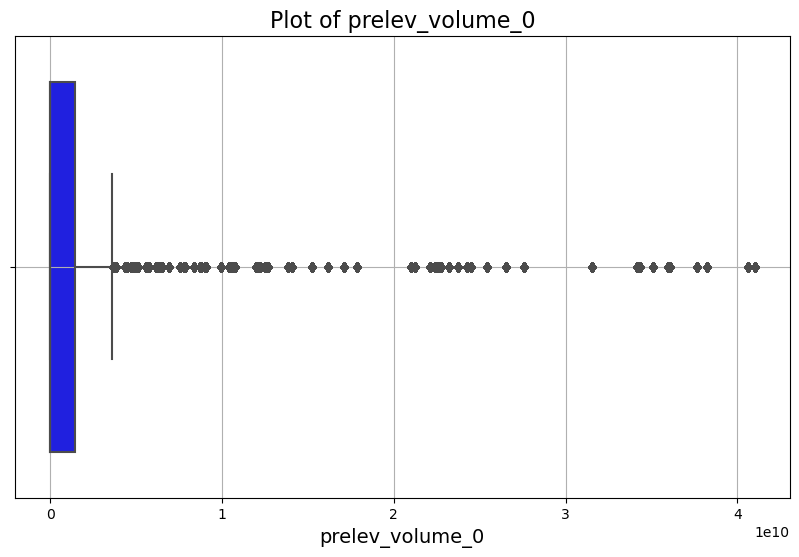

In [18]:
plot_variable(train_data, "prelev_volume_0",plot_type='box')